<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
print(boston_df.columns)

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')


In [8]:
boston_df = boston_df.rename(columns={'Unnamed: 0': 'Id'})
boston_df.describe()

,Id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Text(0.5, 1.0, "Median value of owner-occupied homes in $1000's")

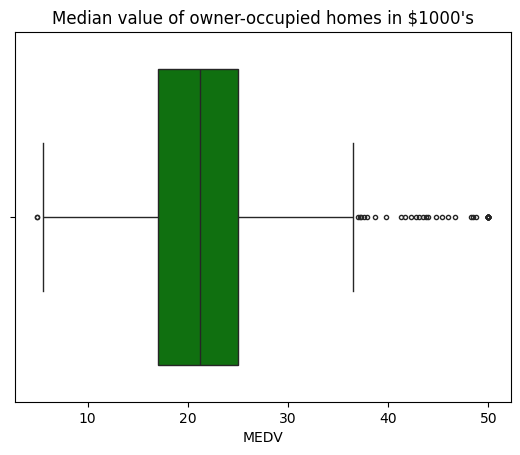

In [9]:
ax=sns.boxplot(x="MEDV",data=boston_df, color="green",fliersize = 3)
ax.set_title("Median value of owner-occupied homes in $1000's")

In [20]:
print("The mean value of owner-occupied homes is ", boston_df["MEDV"].mean())

The mean value of owner-occupied homes is  22.532806324110677


In [21]:
boston_df["CHAS"].nunique()

2

In [12]:
boston_df.dtypes

Id           int64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
LSTAT      float64
MEDV       float64
dtype: object

In [15]:
boston_df["CHAS"]=boston_df["CHAS"].replace({1.0:"River",0.0:"No River"})

In [16]:
boston_df.head()

,Id,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,No River,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,No River,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,No River,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,No River,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,No River,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Places with river views represent only 6.9% of the total.


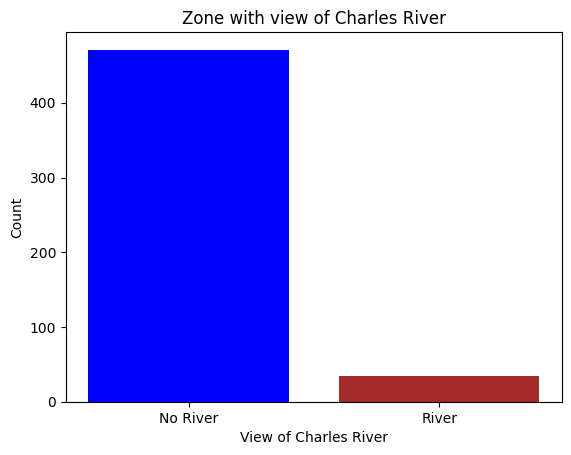

In [22]:
river=boston_df.CHAS.value_counts().sort_index()
pyplot.bar(river.index,river.values,color=["blue","brown"])
pyplot.xlabel('View of Charles River')
pyplot.ylabel('Count')
pyplot.title('Zone with view of Charles River')
print("Places with river views represent only 6.9% of the total.")
#Charles River dummy variable

In [18]:
river

CHAS
No River    471
River        35
Name: count, dtype: int64

In [23]:
categories=pd.cut(boston_df.AGE,bins=[2.9,35,70,100], labels=["35 or less", "35 to 70", "70 or more"])
boston_df.insert(1,"Categorie of AGE",categories)
                  

In [24]:
boston_df.head()

,Id,Categorie of AGE,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,35 to 70,0.00632,18.0,2.31,No River,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,70 or more,0.02731,0.0,7.07,No River,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,35 to 70,0.02729,0.0,7.07,No River,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,35 to 70,0.03237,0.0,2.18,No River,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,35 to 70,0.06905,0.0,2.18,No River,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


<ipython-input-39-98c0eacda0ca>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.boxplot(x='Categorie of AGE', y="MEDV", data=boston_df,palette="Set1")


At first glance, it seems that there is a difference in the average value of houses with respect to the AGE variable.


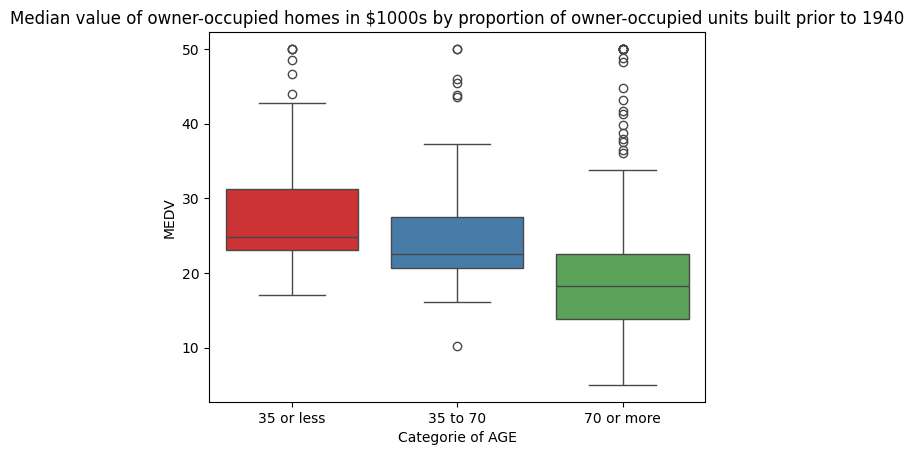

In [39]:
ax= sns.boxplot(x='Categorie of AGE', y="MEDV", data=boston_df,palette="Set1")
ax.set_title('Median value of owner-occupied homes in $1000s by proportion of owner-occupied units built prior to 1940')
print("At first glance, it seems that there is a difference in the average value of houses with respect to the AGE variable.")

Text(0.5, 1.0, 'Relation between nitric oxides concentration pp10m and proportion of non-retail business acres per town')

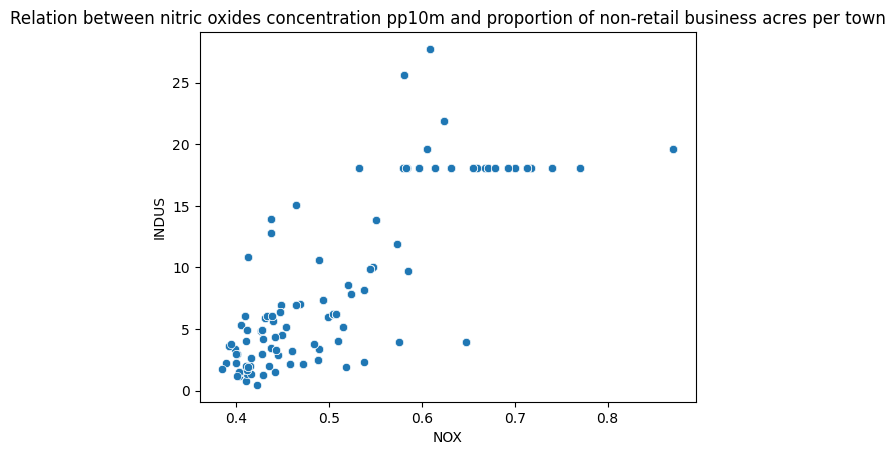

In [26]:
ax=sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title("Relation between nitric oxides concentration pp10m and proportion of non-retail business acres per town")


Text(0.5, 1.0, 'Distribution of pupil-teacher ratio by town')

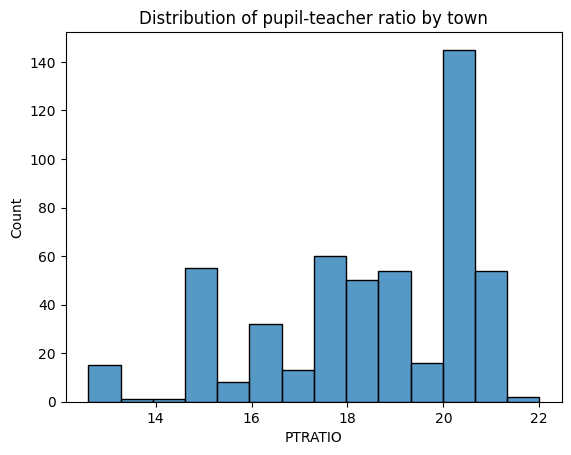

In [28]:
ax=sns.histplot(boston_df["PTRATIO"])
ax.set_title("Distribution of pupil-teacher ratio by town")

## Task 3: Use the appropriate tests to answer the questions provided.

##### 3.1   Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

 *Null hypothesis:* There is no signidicant difference in median value of houses bounded by the Charles river m0=m1
 
 *Alternative hypothesis:* There is  significant difference in median value of houses bounded by the Charles river m0<>m1

In [29]:
scipy.stats.ttest_ind(boston_df[boston_df["CHAS"]=="River"]["MEDV"],boston_df[boston_df["CHAS"]=="No River"]["MEDV"])

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

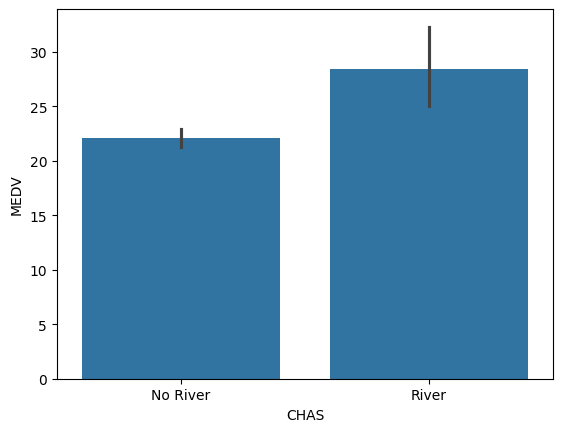

In [30]:
sns.barplot(x="CHAS",y="MEDV",data=boston_df)

In [31]:
river = boston_df.groupby("CHAS").agg({"MEDV":["mean","std","count"]}).reset_index()
river

CHAS       MEDV                 
                  mean        std count
0  No River  22.093843   8.831362   471
1     River  28.440000  11.816643    35

We reject the null hypothesis cause de pvalue are lower that our alpha level 0.05
So, exist significant difference in median values of houses bounded by the Charles river m0<>m1

##### 3.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

 *Null hypothesis:* There is no significant difference in median values of houses for proportion of owner occupied m0=m1=m2
 
 *Alternative hypothesis:* There is  significant difference in median values of houses for proportion of owner occupied m0<>m1<>m2

In [32]:
boston_df.groupby('Categorie of AGE').agg({"MEDV":['mean', 'std','count']})

<ipython-input-32-446bdfb65bdc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  boston_df.groupby('Categorie of AGE').agg({"MEDV":['mean', 'std','count']})


MEDV                
                       mean       std count
Categorie of AGE                           
35 or less        27.788889  7.679967    90
35 to 70          24.947656  6.969370   128
70 or more        19.793380  9.515375   287

In [33]:
low= boston_df[boston_df["Categorie of AGE"]=="35 or less"]["MEDV"]
mid= boston_df[boston_df["Categorie of AGE"]=="35 to 70"]["MEDV"]
high= boston_df[boston_df["Categorie of AGE"]=="70 or more"]["MEDV"]
f_statistic, p_value=scipy.stats.f_oneway(low, mid, high)
print(f'Statistic F: {f_statistic}')
print(f'Value p: {p_value}')

Statistic F: 36.23453758619041
Value p: 1.998493186839628e-15


We reject the null hypothesis cause de p-value are lower that our alpha level 0.05
So, exist significant difference in median values of houses for proportion of owner occupied m0<>m1<>m2

##### 3.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

 *Null hypothesis:* There is no relation between nitric oxide concentrations and proportion of non-retail business acres per town r=0
 
 *Alternative hypothesis:* There exists the relation between an Nitric oxide concentrations and proportion of non-retail business acres per town r<>0

In [34]:
NOXC=boston_df[["NOX","INDUS"]]
NOXC.corr(method="pearson")
scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

###### We reject the null hypothesis and conclude that there exists the relationship between an Nitric oxide concentrations and proportion of non-retail business acres per town, and we can see the positive correlation with the coefficient of 0.763

##### 3.4 What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

 *Null hypothesis:* There is no relation between distance to the five Boston employment centers and the value of owner occupied homes r=0
 
 *Alternative hypothesis:* There exists the relation between distance to the five Boston employment centers and the value of owner occupied homes r<>0

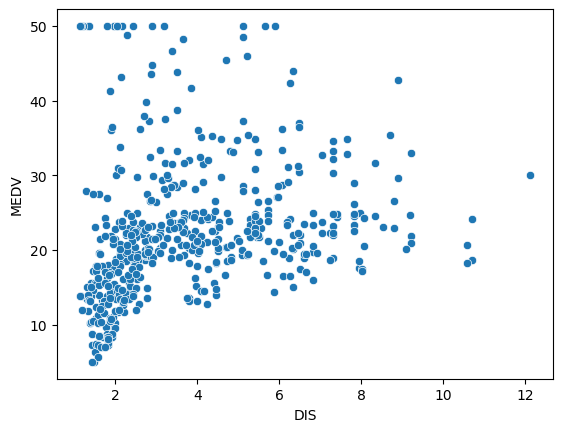

In [35]:
ax=sns.scatterplot(x='DIS', y='MEDV', data=boston_df)

In [36]:
#Verificamos con prueba pearson r
scipy.stats.pearsonr(boston_df["DIS"],boston_df["MEDV"])

PearsonRResult(statistic=0.2499287340859039, pvalue=1.2066117273371074e-08)

In [37]:
X=boston_df["DIS"]
y=boston_df["MEDV"]
X=sm.add_constant(X)

model=sm.OLS(y,X).fit()
predictions=model.predict(X)
model.summary()

# We reject the null hypothesis and conclude that there exists the relationship between between distance
# to the five Boston employment centers and the value of owner occupied homes r=0.248

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 29 May 2025   Prob (F-statistic):           1.21e-08
Time:                        06:22:36   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### We reject the null hypothesis and conclude that there exists the relationship between between distance to the five Boston employment centers and the value of owner occupied homes r =0.248